I created this jupyter notebook to pull the data from the SQLite DB and create simple Analysis using graphs etc

In [2]:
import pandas as pd
import sqlite3 as sql
import numpy as np 
from matplotlib import pyplot as plt

In [3]:
#Creating connection
database = "expense_track.db"
connection = sql.connect(database)

In [4]:
#Testing to see if the query works
query = "SELECT * FROM ExpenseLog"

In [5]:
#Converting to Dataframe
df = pd.read_sql_query(query, connection)
df = df.sort_values(by = "Date")
#df.style.hide_index()

In [6]:
#df["Date"] = pd.to_datetime(df.Date)

In [7]:
df_pivot = df.pivot_table(values = "Amount", index = ["Date"], columns = ["Category"], aggfunc = "sum")

<AxesSubplot:title={'center':'Expense Tracker by Day'}, xlabel='Date', ylabel='Amount Spent'>

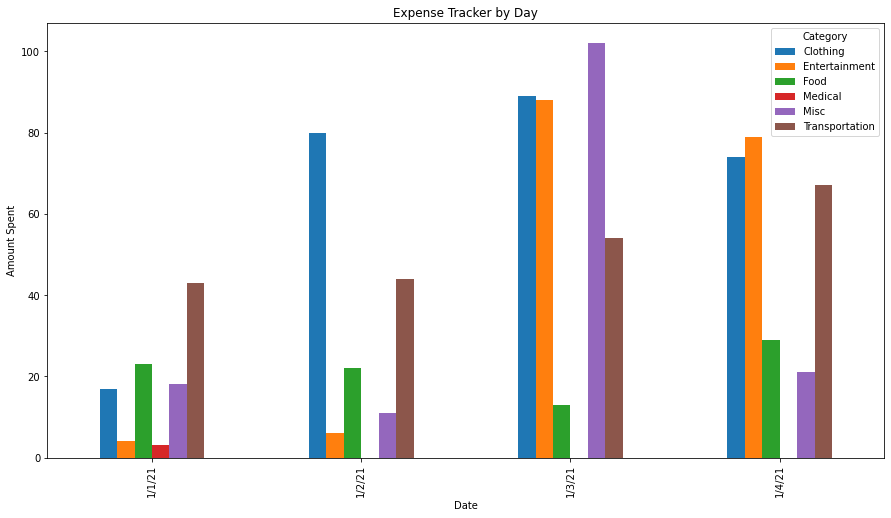

In [52]:
#Grouped bar chart for the Dataframe
df_pivot.plot(kind = "bar", xlabel="Date", ylabel="Amount Spent", title="Expense Tracker by Day",
                    figsize=(15,8))


In [14]:
df_pivot_2 = df.pivot_table(values = "Amount", index = ["Category"], columns = ["Date"], aggfunc = "sum")
df_pivot_2["Total"] = df_pivot_2.sum(axis =1)
df_pivot_2

Date,1/1/21,1/2/21,1/3/21,1/4/21,Total
Category,,,,,
Clothing,17.0,80.0,89.0,74.0,260.0
Entertainment,4.0,6.0,88.0,79.0,177.0
Food,23.0,22.0,13.0,29.0,87.0
Medical,3.0,NaN,NaN,NaN,3.0
Misc,18.0,11.0,102.0,21.0,152.0
Transportation,43.0,44.0,54.0,67.0,208.0


Pie chart by Category 

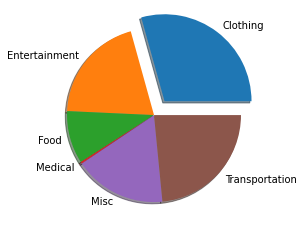

In [53]:
y = np.array(df_pivot_2["Total"])
x = list(df_pivot.columns)
myexplode = [0.2, 0, 0, 0, 0, 0]
plt.pie(y, labels = x, explode = myexplode, shadow = True) 
plt.show() 